<a href="https://colab.research.google.com/github/nikitha752/DeepLearningImageClassification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!curl https://course-v3.fast.ai/setup/colab  | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: course-v3.fast.ai


In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [28]:
from  google.colab import drive

In [29]:
from fastai.vision import *

In [30]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
root_path = 'gdrive/My Drive/AI_Projects/'

In [44]:
(Path(root_path)/'Balls').mkdir(parents=True, exist_ok=True)

In [45]:
proj_path = 'gdrive/My Drive/AI_Projects/Balls/'

In [46]:
folders = ['golf','baseball','basketball','soccer','tennis','bowling','lacrosse','american_football','rugby','cricket','volleyball','dragon','pool','hockey','softball']

In [47]:
#create all folders in /Balls
for i in folders:
  path = Path(proj_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [48]:
p_path = Path(proj_path)

In [58]:
  np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.7/dist-packages/fastai/basic_data.py:262: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access these elements in self.train_ds: 174
  warn(warn_msg)


In [59]:
data.classes

['american_football',
 'baseball',
 'basketball',
 'bowling',
 'cricket',
 'dragon',
 'golf',
 'hockey',
 'lacrosse',
 'pool',
 'rugby',
 'soccer',
 'softball',
 'tennis',
 'volleyball']

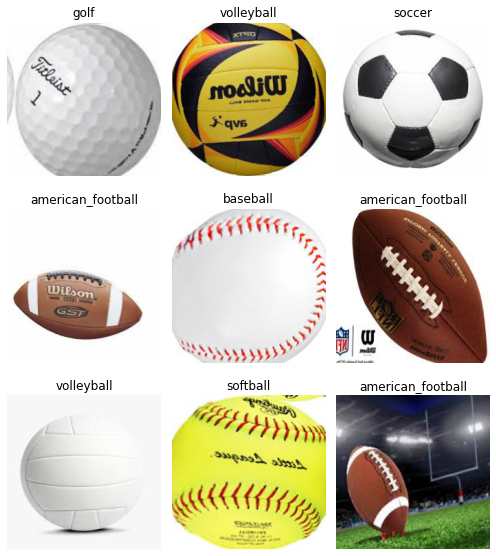

In [60]:
data.show_batch(rows=3,figsize=(7,8))

In [61]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american_football',
  'baseball',
  'basketball',
  'bowling',
  'cricket',
  'dragon',
  'golf',
  'hockey',
  'lacrosse',
  'pool',
  'rugby',
  'soccer',
  'softball',
  'tennis',
  'volleyball'],
 15,
 600,
 150)

In [62]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [63]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,4.047040,1.691749,0.533333,01:19
1,2.502399,0.404125,0.106667,00:09
2,1.655574,0.284192,0.093333,00:08
3,1.178884,0.294186,0.093333,00:08
4,0.888574,0.304075,0.100000,00:08
5,0.695648,0.303306,0.106667,00:08
6,0.556179,0.295548,0.106667,00:08
7,0.455360,0.297214,0.106667,00:08


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [64]:
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Balls/models/model1_34.pth')

In [65]:
learn.unfreeze()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


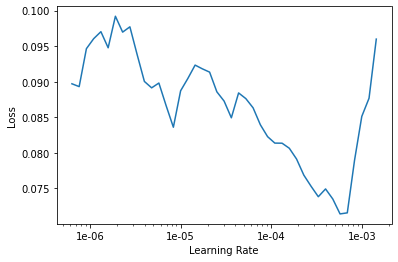

In [66]:
learn.lr_find()
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.096363,0.299325,0.106667,00:09
1,0.079993,0.297208,0.106667,00:09


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


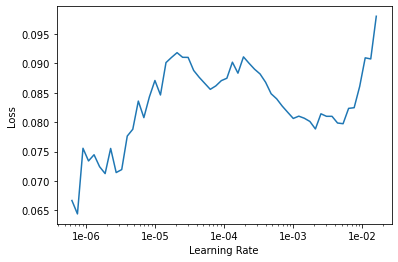

In [68]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()